# Experiment 1

## Startup success prediction
https://www.kaggle.com/manishkc06/startup-success-prediction

"A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion. [Source of information: Wikipedia]
startup image

Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years. Predicting the success of a startup allows investors to find companies that have the potential for rapid growth, thereby allowing them to be one step ahead of the competition."

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from misc_utilities import classification_metrics, plot_conf_matrix, plot_decision_tree

df = pd.read_csv("startup_data.csv", error_bad_lines=False)
print(df.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


## Analyse probleem
#### Wat is het probleem?
De target feature is status, hier zitten binaire waardes in of de startup "closed" of "aquired" is, wat direct vertaalt
naar of de startup  is geslaagd of niet.
#### Dimensies dataset?

In [9]:
print(f'Rows/Columns: {df.shape}')
print(f"Class distribution is: \n{df['labels'].value_counts()}\n")

Rows/Columns: (923, 49)
Class distribution is: 
1    597
0    326
Name: labels, dtype: int64



#### Soorten data/features?

In [10]:
print(df.head(10))
print(df.describe())

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   
5         379         CA  37.406914 -122.090370    94043  c:22898   
6         195         CA  37.391559 -122.070264    94041  c:16191   
7         875         CA  38.057107 -122.513742    94901   c:5192   
8          16         MA  42.712207  -73.203599     1267   c:1043   
9         846         CA  37.427235 -122.145783    94306    c:498   

            city              Unnamed: 6                   name  labels  ...  \
0      San Diego                     NaN            Bandsintown       1  ...   
1      Los Gatos                     NaN              TriCipher       1  ...   


Als we naar de kolommen kijken hebben we niet veel rijen, maar een grote hoeveelheid features van elke startup. De
features zelf gaan grotendeels over eigenschappen van de startup zelf, en de fondsen die het heeft gewerft. De features
zijn numeriek en categorisch, met uitzondering van een paardatum kolommen, maar zelfs die zijn door de uploader van de
dataset omgezet naar numerieke features.

## Methoden
#### Welke preprocessing is nodig?
Het meeste werk is al gedaan in deze dataset, maar we hebben een beetje veel kolommen die weinig toevoegen, die we
moeten weghalen. Een paar voorbeelden hiervan zijn de informatie over de lokatie van de startup, ID's en de kolommen die
origeel niet numeriek waren, maar zijn omgezet. Ook zijn er een paar NaN waardes in sommige kolommen die aangepakt
moeten worden. Bij die rijen gaan we het met het gemiddelde vervangen, in plaats van ze weghalen, want zoveel rijen
hebben we niet.
#### Welke modellen ga je vergelijken?
Omdat we een probleem hebben met veel features, leek het me interessant om Naive Bayes en Support Vector Machine met
elkaar te vergelijken. Het enige probleem is dat deze dataset heeel klein is, en deze modellen waarschijnlijk al te
complex zijn daarvoor. Daarom ga ik K Nearest Neighbours en Random Forest vergelijken.
#### Welke performance metric is passend?
We hebben een classificatie metric nodig. Onze klasses hebben niet een gelijke ratio, dus accuracy is niet een optie.
Er is geen specifieke voorkeur voor één van de klasses, dus F1 score past goed bij dit probleem.

## Voorspelling
#### Welke classifier zal het beste zijn en waarom?
Random Forest zal het het beste doen, omdat het probleem heel simpel is, en het model ontworpen is om het overfitting
van Decision Trees te voorkomen.
#### Welke hyperparameters zijn relevant en waarom?
KNN
- Neigbours

Random Forest
- Max depth

It is not expected that tuning will have much effect beyond the most obvious parameters.

## Process

In [11]:
df.drop(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name',
         'founded_at', 'closed_at','first_funding_at', 'last_funding_at','state_code.1', 'is_CA', 'is_NY','is_MA',
         'is_TX', 'is_otherstate', 'category_code', 'object_id', 'has_roundA','has_roundB', 'has_roundC',
         'has_roundD', 'status'],
        inplace=True, axis=1)
print(df.isna().any())
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean(), inplace=True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mean(), inplace=True)

labels                      False
age_first_funding_year      False
age_last_funding_year       False
age_first_milestone_year     True
age_last_milestone_year      True
relationships               False
funding_rounds              False
funding_total_usd           False
milestones                  False
is_software                 False
is_web                      False
is_mobile                   False
is_enterprise               False
is_advertising              False
is_gamesvideo               False
is_ecommerce                False
is_biotech                  False
is_consulting               False
is_othercategory            False
has_VC                      False
has_angel                   False
avg_participants            False
is_top500                   False
dtype: bool


In [12]:
labels = df['labels']
df.drop(['labels'], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, labels, random_state=5, train_size=0.8, stratify=labels)

In [13]:
knn = KNeighborsClassifier(81)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## Resultaten

0.8028169014084506
0.8803088803088803


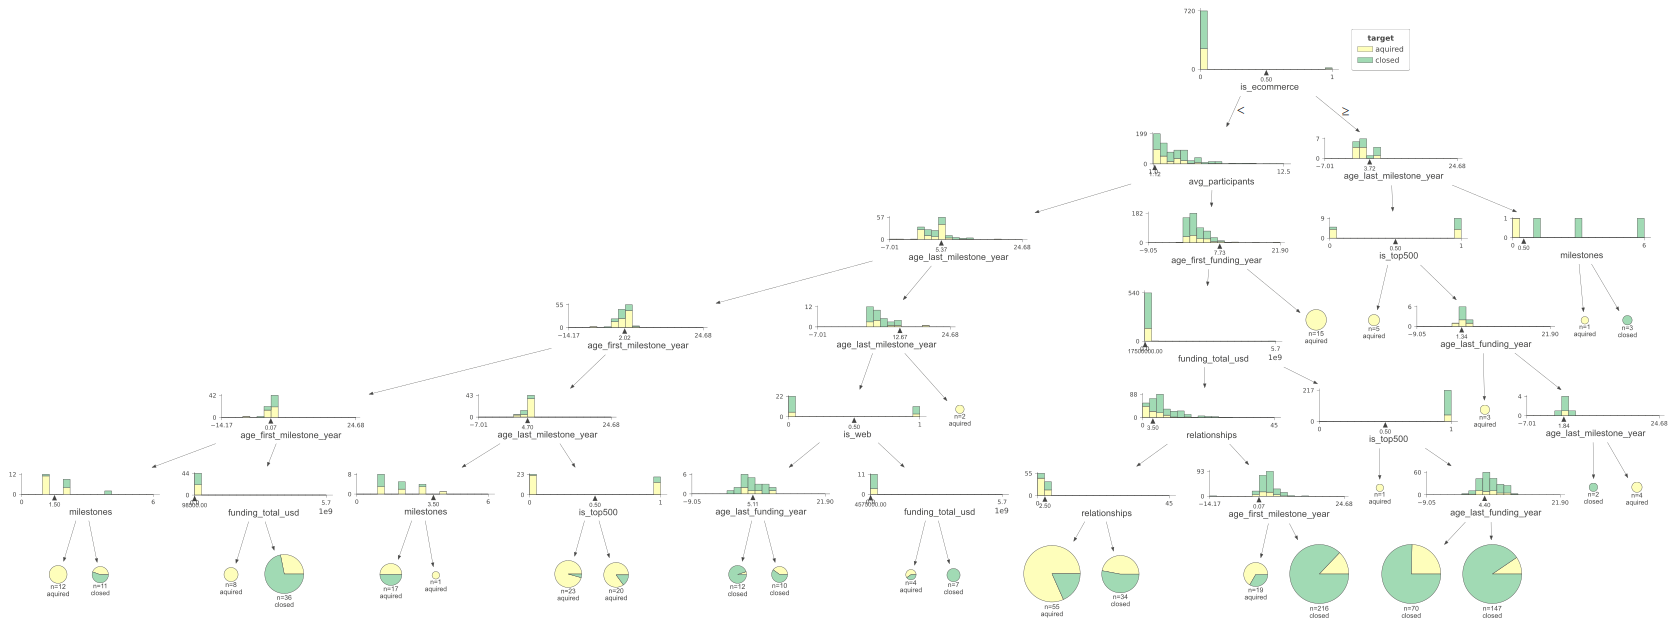

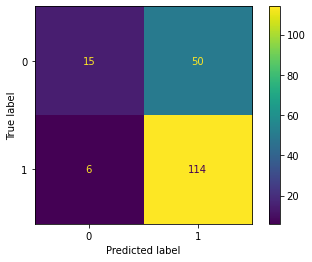

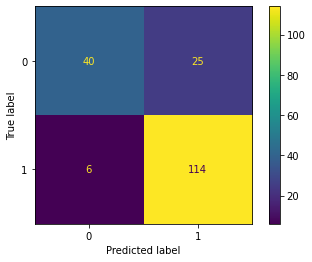

In [14]:
print(classification_metrics(y_test, knn_pred)['F1'])
print(classification_metrics(y_test, rf_pred)['F1'])

plot_conf_matrix(y_test, knn_pred)
plot_conf_matrix(y_test, rf_pred)

plot_decision_tree(rf.estimators_[0], X_train, y_train, df.columns, ['aquired', 'closed'])

## Conclusie
#### Welke classifier had het beste resultaat?
Random Forest had uiteindelijk het beste resultaat, met een F1 score van ~0.88
#### Kwam dit overeen met de voorspelling? Waarom wel/niet?
Dit kwam overeen met mijn voorspelling. Het lijkt er dus op dat Random Forest vrij goed is met kleine datasets, en onze
set zelf goede geschikt was om trees mee te splitten.